In [1]:
import numpy as np
import sympy as symp
import matplotlib.pyplot as plt

# B-Spline basis function

### Knot Vector helpers

In [2]:
def unique(knot):
    unique_knot = []
    for i in knot:
        if i not in unique_knot:
            unique_knot.append(i)
    return unique_knot

def check_non_decreasing(knot):
    size = len(knot)
    for i in range(0,size):
        for j in range(i+1, size):
            if knot[i]>knot[j]:
                raise Exception('Please enter the non-decreasing knot vector')

In [3]:
def basis_index(p, knot, el):
    basis = []
    for i in range(0,p+1):
        basis.append(i)

    unq_knt = unique(knot)
    size = len(knot)
    span = unq_knt[el-1:el+1]
    
    cnt = 0
    for i in range(1,el):
        temp_knt = knot[p+i:size]
        for j in temp_knt:
            if unq_knt[i]==j:
                cnt = cnt+1
                
    for i in range(0,p+1):
        basis[i] = basis[i]+cnt
    
#     print(basis)
    return basis, span

In [4]:
def bspline_sym(i, p, knot, xi, xval):
    """
    This function returns the B-Spline basis function with following data
    
    Input::
        i - Index of basis function.
        p - Degree of Spline.
        knot - Knot Vector
        xi - Symbolic value of xi
        xval - Parametric value
        
    Output:
        Symbolic expression of B-Spline Derivative
    """
    
    check_non_decreasing(knot)
    
    for j in range(0,p+1):
        if knot[j] !=0 or knot[-1-j] !=1:
            raise Exception("Please Enter Valid, Clamped Knot vector")
            
    if p==0:
        if xval==1:
            if knot[i]<=xval<=knot[i+1]:
                B=1       
            else:
                B=0
        else:
            if knot[i]<=xval<knot[i+1]:
                B=1       
            else:
                B=0
                
    elif p>0:
        d1 = (knot[i+p]-knot[i])
        d2 = (knot[i+p+1]-knot[i+1])
        if d1==0:
            b1 = 0
        else:
            b1 = ((xi-knot[i])/d1)*bspline_sym(i, p-1, knot, xi,xval)
        if d2==0:
            b2= 0
        else:
            b2 = ((knot[i+p+1]-xi)/d2)*bspline_sym(i+1, p-1, knot, xi,xval)

        B = b1+b2
    else:
        B=0
    
    return B

### Element basis functions

In [16]:
def bspline_elem_basis(p, knot, xi, el, simplify):
    basis, span = basis_index(p, knot, el)
    xval = (span[0]+span[1])/2
    funcs = []
#     print(basis, span)
#     print(xval)
    for b in basis:
        funcs.append(bspline_sym(b,p,knot,xi,xval))
        
    if simplify:
        for i in range(0,len(funcs)):
            funcs[i] = funcs[i].simplify() 
    else:
        for i in range(0,len(funcs)):
            funcs[i] = funcs[i].expand()
     
    return funcs

## Element Basis functions

In [34]:
p = 2
kont = [0,0,0,0.5,1,1,1]
xi = symp.Symbol('xi')
el = 1
simplify = True
basis  = bspline_elem_basis(p, kont, xi, el, simplify)
basis[0]

4.0*(xi - 0.5)**2

In [31]:
# Latex format of the basis functions.
print(symp.latex(basis))

\left[ 4.0 \left(\xi - 0.5\right)^{2}, \  \xi \left(4.0 - 6.0 \xi\right), \  2.0 \xi^{2}\right]


## Plotting Basis function

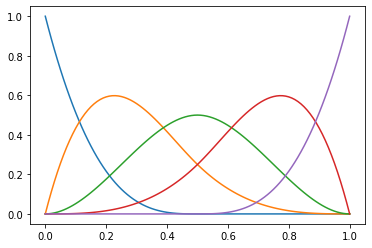

In [6]:
a = symp.Symbol('xi')
p = 3
knot = [0,0,0,0,0.5,1,1,1,1]

num = len(knot)-(p+1)
for i in range(0,num):
    par = [];
    bsp = []
    for x in range(0,101):
        basis =bspline_sym(i, p, knot, a,x/100)
        par.append(x/100)
        bsp.append(basis.subs(a,x/100))
    plt.plot(par,bsp)


# B-spline derivative

In [69]:
def bspline_der(i,p,knot,xi,xval, n):
    """
    This function returns the n^th order derivative of B-Spline basis function with following data
    
    Input::
        i - Index of basis function.
        p - Degree of Spline.
        knot - Knot Vector
        xi - Symbolic value of xi
        xval - Parametric value
        n - Order of the derivative
        
    Output:
        Symbolic expression of n^th order derivative of B-Spline
    """
    if n==1:
        d1 = knot[i+p]-knot[i]
        if d1==0:
            B1 = 0
        else:
            B1 = (p/d1)*bspline_sym(i, p-1, knot, xi, xval)

        print(B1)

        d2 = knot[i+p+1]-knot[i+1]
        if d2==0:
            B2 = 0
        else:
            B2 = (p/d2)*bspline_sym(i+1, p-1, knot, xi, xval)
        print(B2)
        der = B1-B2
    else:
        d1 = knot[i+p]-knot[i]
        if d1==0:
            B1 = 0
        else:
            B1 = (p/d1)*bspline_der(i, p-1, knot, xi, xval,n-1)

        print(B1)

        d2 = knot[i+p+1]-knot[i+1]
        if d2==0:
            B2 = 0
        else:
            B2 = (p/d2)*bspline_der(i+1, p-1, knot, xi, xval,n-1)
        print(B2)
        der = B1-B2
        
    return der

# Calculating the Derivative

In [73]:
a = sp.Symbol('xi')
i = 2
p = 2
knot = [0,0,0,0.5,1,1,1]
xval = 0
bspline_der(i,p,knot,a,xval,2)

2.0
0.0
4.0
0.0
0
0.0


4.0